**Name:** Veljko Kovac

PyTorch and Neural Networks

## Simple Regression with PyTorch

1. Creating network model

Our network model is a simple Linear layer with an input and an output shape of 1. 


In [1]:
from __future__ import print_function
#
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
# Visualize our data
import matplotlib.pyplot as plt
import numpy as np



In [2]:
class Net(nn.Module):
   def __init__(self):
       super(Net, self).__init__()
       self.layer = torch.nn.Linear(1, 1)

   def forward(self, x):
       x = self.layer(x)      
       return x

net = Net()
print(net)


Net(
  (layer): Linear(in_features=1, out_features=1, bias=True)
)


2. Test Data 

Before you start the training process, you need to know our data. You make a random function to test our model. $Y = x^3 sin(x) + 3x + 0.8 rand(100)$


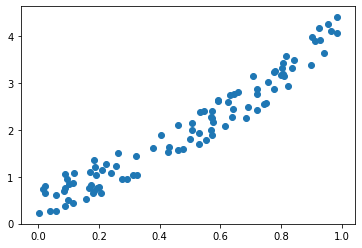

In [3]:
x = np.random.rand(100)
y = np.sin(x) * np.power(x,3) + 3*x + np.random.rand(100)*0.8

plt.scatter(x, y)
plt.show()

In [4]:
# convert numpy array to tensor in shape of input size
x = torch.from_numpy(x.reshape(-1,1)).float()
y = torch.from_numpy(y.reshape(-1,1)).float()
print(x, y)

tensor([[0.7202],
        [0.5448],
        [0.2243],
        [0.9639],
        [0.1696],
        [0.1136],
        [0.5544],
        [0.9857],
        [0.7224],
        [0.4598],
        [0.7753],
        [0.1799],
        [0.0895],
        [0.6451],
        [0.9542],
        [0.6831],
        [0.5708],
        [0.0235],
        [0.7801],
        [0.5072],
        [0.7559],
        [0.5684],
        [0.5937],
        [0.7993],
        [0.0231],
        [0.6259],
        [0.7088],
        [0.1753],
        [0.0880],
        [0.4773],
        [0.8975],
        [0.4033],
        [0.7758],
        [0.0583],
        [0.8167],
        [0.8051],
        [0.7432],
        [0.0579],
        [0.1889],
        [0.9237],
        [0.1586],
        [0.1856],
        [0.5298],
        [0.5713],
        [0.5731],
        [0.2561],
        [0.6398],
        [0.8426],
        [0.9133],
        [0.7497],
        [0.1184],
        [0.2411],
        [0.4607],
        [0.6434],
        [0.0938],
        [0

3. Optimizer and Loss

Defining the Optimizer and the Loss Function for our training process. 

In [5]:
optimizer = torch.optim.SGD(net.parameters(), lr=0.2)
loss_func = torch.nn.MSELoss()


4. Training

Start our training process with an epoch of 250. Iterate our data to find the best value for our hyperparameters. 

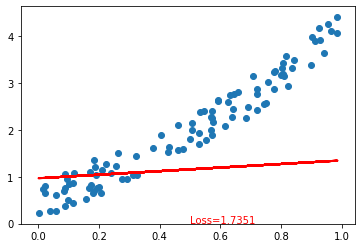

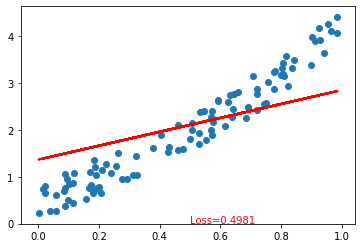

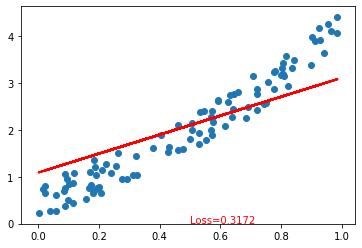

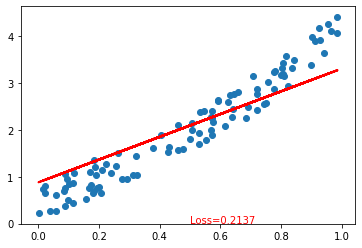

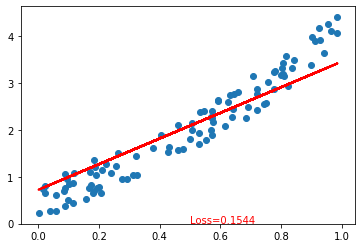

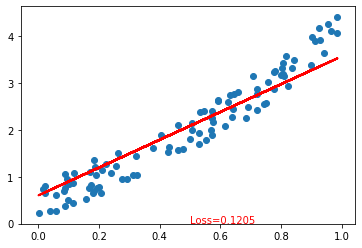

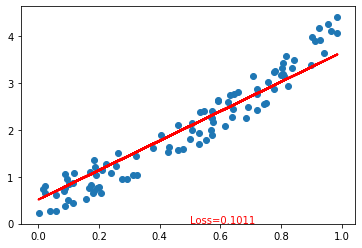

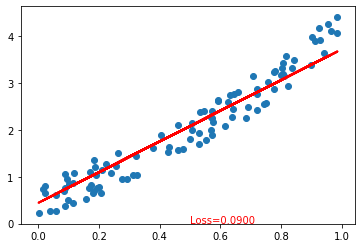

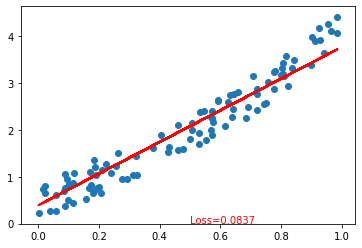

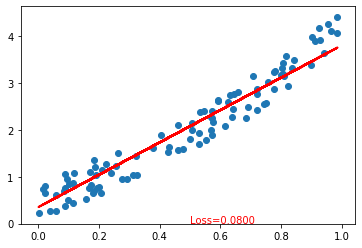

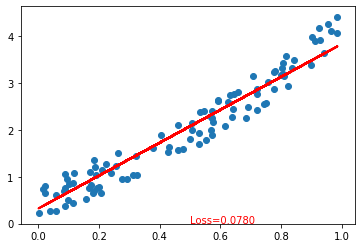

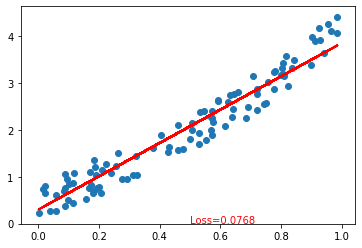

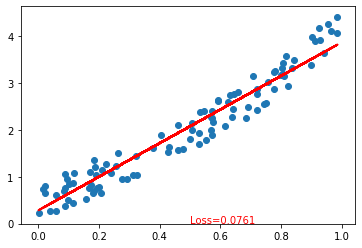

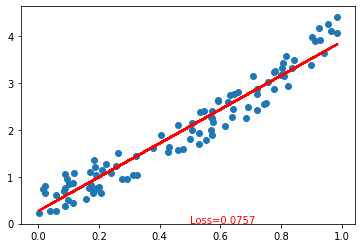

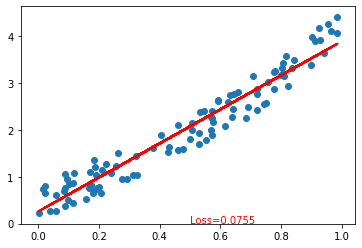

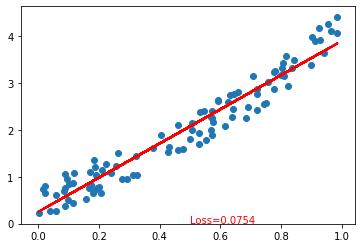

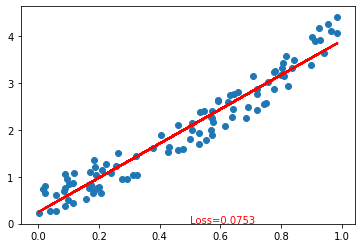

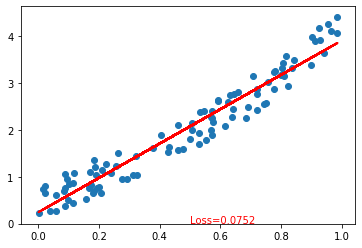

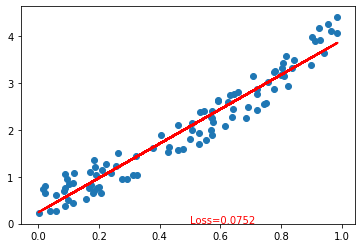

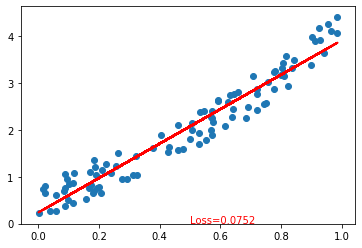

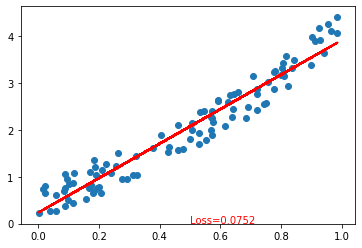

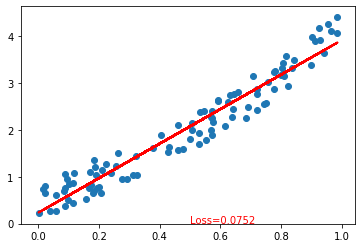

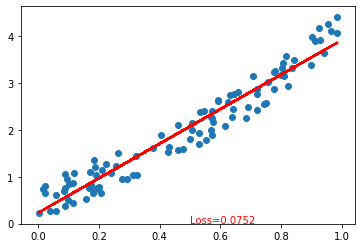

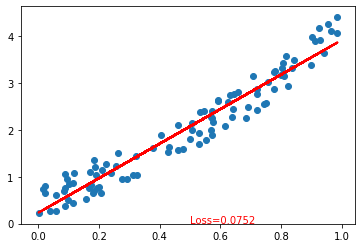

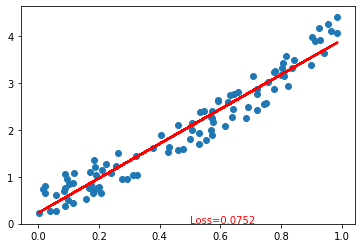

In [6]:
inputs = Variable(x)
outputs = Variable(y)

for i in range(250):
   prediction = net(inputs)
   loss = loss_func(prediction, outputs) 
   optimizer.zero_grad()
   loss.backward()        
   optimizer.step()       

   if i % 10 == 0:
       # plot and show learning process
       plt.cla()
       plt.scatter(x.data.numpy(), y.data.numpy())
       plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=2)
       plt.text(0.5, 0, 'Loss=%.4f' % loss.data.numpy(), fontdict={'size': 10, 'color':  'red'})
       plt.pause(0.1)

plt.show()

## Task
Next, trying to regress the random function $Y = x^5cos(x) - 3x + rand(100)$ by the neural network. Required to use other optimizer and loss function.

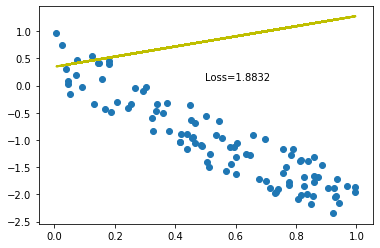

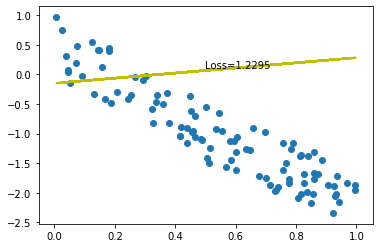

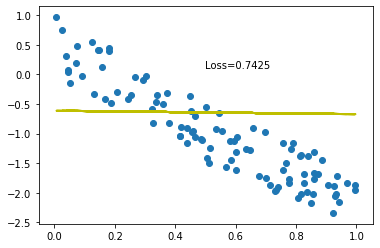

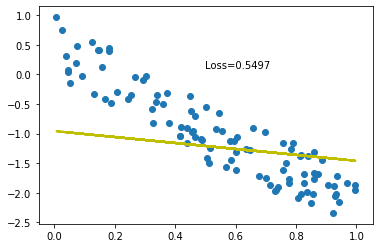

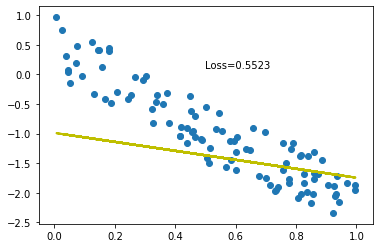

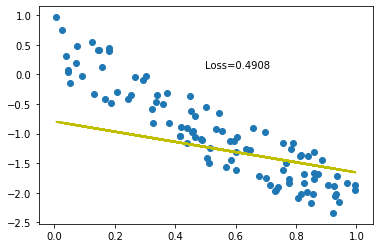

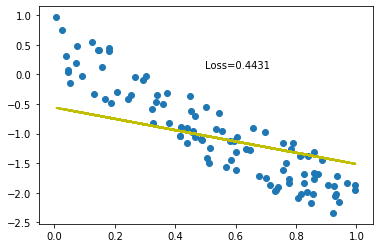

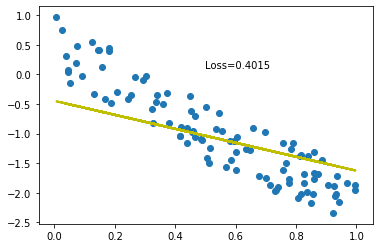

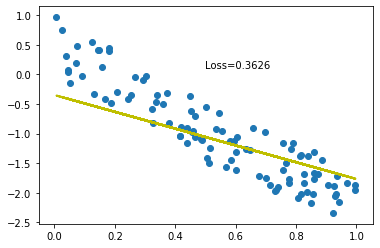

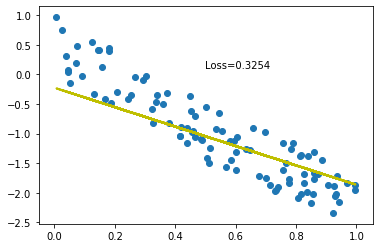

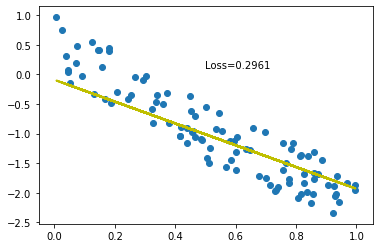

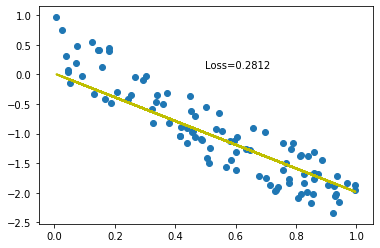

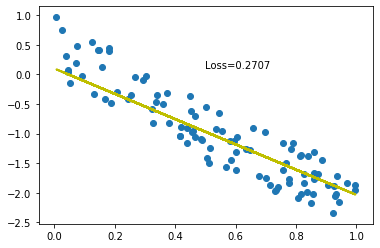

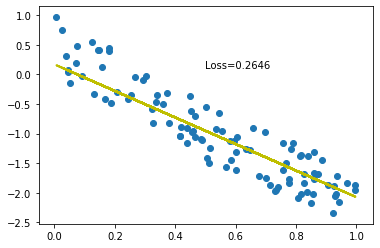

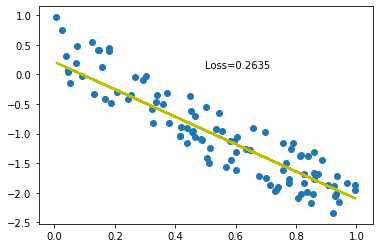

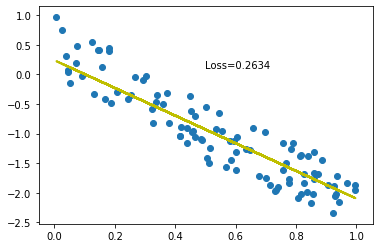

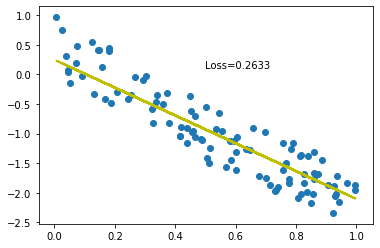

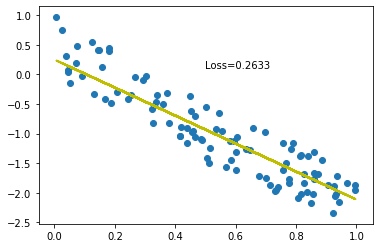

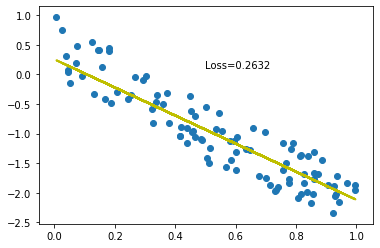

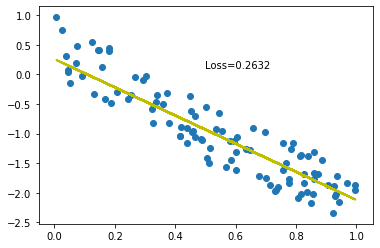

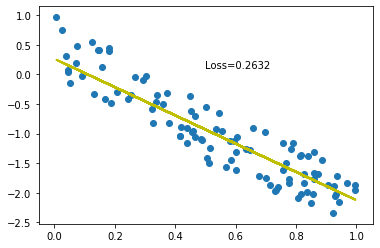

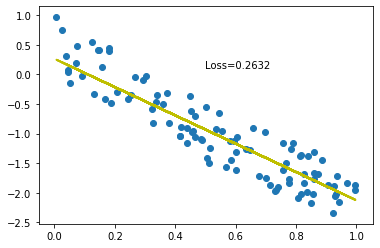

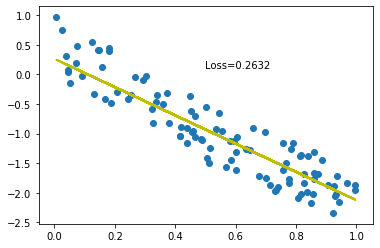

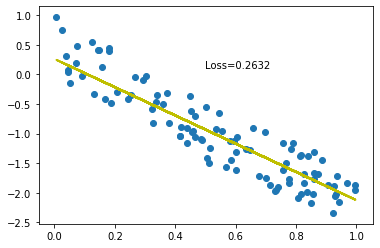

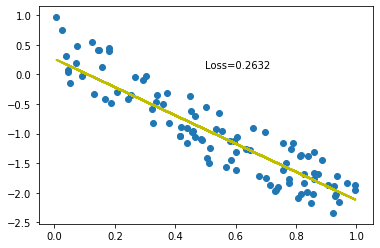

In [7]:
##INSERT YOUR CODE HERE

class Net2(nn.Module):
    def __init__(self):
        super(Net2,self).__init__()
        self.layer = torch.nn.Linear(1,1)
        
    def forward(self,x):
        x = self.layer(x)
        return x
net2 = Net2()

x1 = np.random.rand(100)
y1 = np.power(x1,5)*np.cos(x1) -3*x1 + np.random.rand(100)

x1 = torch.from_numpy(x1.reshape(-1,1)).float()
y1 = torch.from_numpy(y1.reshape(-1,1)).float()


optimizer1 = torch.optim.Adam(net2.parameters(),lr=0.05) #Different optimizer 
loss_func1 = torch.nn.L1Loss() #Different Loss 

inputs1 = Variable(x1)
outputs1 = Variable(y1)


for i in range(250):
    pred = net2(inputs1)
    loss1 = loss_func1(pred,outputs1)
    optimizer1.zero_grad()
    loss1.backward()
    optimizer1.step()
    
    if i%10 == 0:
        plt.cla()
        plt.scatter(x1.data.numpy(),y1.data.numpy())
        plt.plot(x1.data.numpy(),pred.data.numpy(), 'y-',lw=2)
        plt.text(0.5,0.1,'Loss=%.4f'%loss1.data.numpy(),fontdict={'size':10, 'color':'black'})
        plt.pause(0.1)
        
plt.show()